## Primer: iskanje neslanih šal

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

##### Odgovor 4-2-1

**$X$: povprečje ocen posameznih šal**

Za vsako šalo zberemo ocene več ljudi.
Če imamo 100 šal, dobimo 100 povprečij (eno na šalo).

**$Y$: varianca ocen posameznih šal**

Za vsako šalo pogledamo, kako razpršene so ocene. Spet, s 100 šalami dobimo 100 varianc.

Torej $X$ meri, kako smešna je šala v povprečju. Visoka povprečna ocena pomeni, da večina ljudi na splošno meni, da je šala smešna in da dosledno dosega dobre ocene. Nizka povprečna ocena pomeni, da se večini ljudi šala ni zdela smešna.

In $Y$ meri, koliko ljudi se ne strinja glede šale. Visoka varianca pomeni, da obstaja veliko nesoglasij med ocenjevalci: nekateri menijo, da je šala smešna, drugi pa, da je grozna. Medtem ko nizka varianca pomeni, da so ocene tesno združene, kar pomeni, da se skoraj vsi strinjajo glede kakovosti šale.

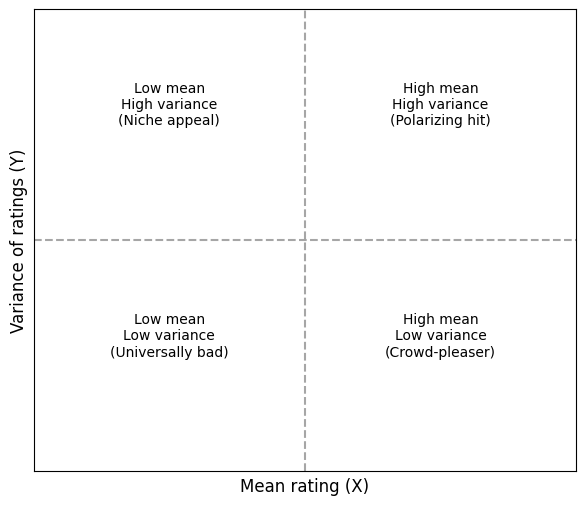

In [2]:
import matplotlib.pyplot as plt

quadrants = [
    {"x": 7.5, "y": 2.5, "label": "High mean\nLow variance\n(Crowd-pleaser)"},
    {"x": 7.5, "y": 7.5, "label": "High mean\nHigh variance\n(Polarizing hit)"},
    {"x": 2.5, "y": 2.5, "label": "Low mean\nLow variance\n(Universally bad)"},
    {"x": 2.5, "y": 7.5, "label": "Low mean\nHigh variance\n(Niche appeal)"},
]

fig, ax = plt.subplots(figsize=(7, 6))

for q in quadrants:
    ax.text(q["x"], q["y"], q["label"], ha='center', fontsize=10)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Mean rating (X)", fontsize=12)
ax.set_ylabel("Variance of ratings (Y)", fontsize=12)

ax.axvline(5, color="gray", linestyle="--", alpha=0.7)
ax.axhline(5, color="gray", linestyle="--", alpha=0.7)

plt.show()


##### Odgovor 4-2-2

In [3]:
X = np.genfromtxt('../data/jester-data.csv', delimiter=',',)[:, 1:]
X[np.where(X == 99)] = float("nan")  
means     = []
variances = []
for i in range(X.shape[1]):
    s = np.mean(X[:, i][np.isnan(X[:, i]) == False])
    v = np.var(X[:, i][np.isnan(X[:, i]) == False])
    means.append(s)
    variances.append(v)

In [4]:
normal = stats.norm
mu_fit, sigma_fit = normal.fit(means)
alpha = 0.05

xr  = np.linspace(-5, 5, 100)
width = xr[1] - xr[0]  
Px = [normal.pdf(x, mu_fit, sigma_fit) * (xr[1]-xr[0])   for x in xr]

for qx in means:
    ltx = xr[xr <= qx]      
    P_ltx = [normal.pdf(x, mu_fit, sigma_fit) * width for x in ltx] 
    p_value = np.sum(P_ltx)
    if p_value < alpha:
        print(f"Outlier joke with mean rating {qx:.2f} has p-value {p_value:.4f}")

Outlier joke with mean rating -1.74 has p-value 0.0483
Outlier joke with mean rating -2.18 has p-value 0.0224
Outlier joke with mean rating -2.89 has p-value 0.0064
Outlier joke with mean rating -1.78 has p-value 0.0418
Outlier joke with mean rating -1.87 has p-value 0.0360
Outlier joke with mean rating -1.81 has p-value 0.0418
Outlier joke with mean rating -3.57 has p-value 0.0018


##### Odgovor 4-2-3

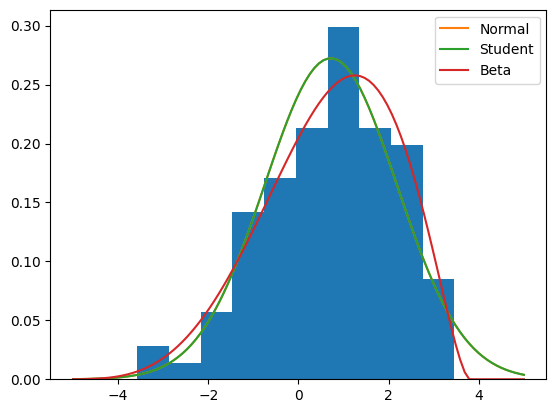

In [5]:
data = means
plt.figure()
plt.hist(data, density=True)

def plot_fit(distribution, label):
    pars = distribution.fit(data)
    P_fit = [distribution.pdf(x, *pars) for x in xr]
    plt.plot(xr, P_fit, label=label)

plot_fit(stats.norm, "Normal")
plot_fit(stats.t, "Student")
plot_fit(stats.beta, "Beta")

plt.legend();

##### Odgovor 4-2-4

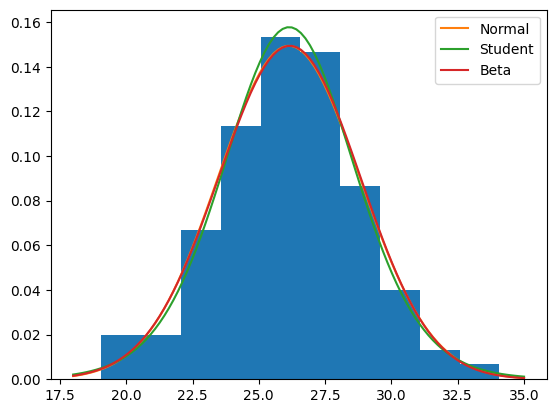

In [8]:
data = variances
xr  = np.linspace(18, 35, 100)
plt.figure()
plt.hist(data, density=True)

plot_fit(stats.norm, "Normal")
plot_fit(stats.t, "Student")
plot_fit(stats.beta, "Beta")

plt.legend();

In [7]:
normal = stats.norm
mu_fit, sigma_fit = normal.fit(variances)
alpha = 0.05

xr  = np.linspace(18, 35, 100)
width = xr[1] - xr[0]  
Px = [normal.pdf(x, mu_fit, sigma_fit) * (xr[1]-xr[0])   for x in xr]

for qx in variances:
    ltx = xr[xr <= qx]      
    P_ltx = [normal.pdf(x, mu_fit, sigma_fit) * width for x in ltx] 
    p_value = np.sum(P_ltx)
    if p_value < alpha:
        print(f"Outlier joke with variance {qx:.2f} has p-value {p_value:.4f}")

Outlier joke with variance 19.47 has p-value 0.0052
Outlier joke with variance 21.28 has p-value 0.0354
Outlier joke with variance 20.37 has p-value 0.0136
Outlier joke with variance 19.06 has p-value 0.0032
Outlier joke with variance 21.56 has p-value 0.0409
